<a href="https://colab.research.google.com/github/RohanKaushikan/CancerBioinformatics/blob/main/CombinedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trying With More PatientData and Multi Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!pip install XGBoost

In [ ]:
!pip install seaborn

In [ ]:
data = pd.read_csv('multi_combined_subset.csv')

In [ ]:
import pandas as pd


# Assume `df` is your DataFrame and it has a 'class' column that contains the class labels
# 1. Separate the different classes
df_class_0 = data[data['Disease Free Status'] == 0]
df_class_1 = data[data['Disease Free Status'] == 1]


# Count the number of samples in each class
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)


# Downsample the majority class (assume class 0 is the majority here)
df_class_0_downsampled = df_class_0.sample(2*count_class_1)


# Combine the downsampled majority class DataFrame with the minority class DataFrame
df_downsampled = pd.concat([df_class_0_downsampled, df_class_1], axis=0)


# Shuffle the dataset
df_downsampled = df_downsampled.sample(frac=1).reset_index(drop=True)


# Now `df_downsampled` is the downsampled dataset

In [ ]:
X = df_downsampled.drop('Disease Free Status', axis=1)
y = df_downsampled['Disease Free Status']

In [ ]:
from collections import Counter
print(len(df_downsampled['Hugo_Symbol']))
print(len(Counter(df_downsampled['Hugo_Symbol'])))

16308
9314


In [ ]:
categorical_features = ['Consequence', 'Variant_Classification', 'Cancer Stage', 'Race']
#categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
x_encoded = pd.get_dummies(X, columns = categorical_features, drop_first = True)
x_encoded.head()

,Hugo_Symbol,Diagnosis Age,Mutation Count,Consequence_5_prime_UTR_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_frameshift_variant,Consequence_inframe_deletion,Consequence_inframe_insertion,Consequence_intron_variant,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,PCM1,73,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,GOLGA1,62,52,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,SLC4A3,44,29,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,ARHGAP24,60,785,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,SPATA31E1,77,689,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
label_encoder = LabelEncoder()
x_encoded['Hugo_Symbol'] = label_encoder.fit_transform(x_encoded['Hugo_Symbol'])
x_encoded.head()

,Hugo_Symbol,Diagnosis Age,Mutation Count,Consequence_5_prime_UTR_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_frameshift_variant,Consequence_inframe_deletion,Consequence_inframe_insertion,Consequence_intron_variant,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,5767,73,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3114,62,52,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,7334,44,29,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,490,60,785,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7557,77,689,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
numeric_features = ['Diagnosis Age', 'Mutation Count']
#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the desired columns in the DataFrame
scaler.fit(X_train[['Diagnosis Age', 'Mutation Count']])

# Now transform the columns
X_train[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_train[['Diagnosis Age', 'Mutation Count']])
X_test[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_test[['Diagnosis Age', 'Mutation Count']])

In [ ]:
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numeric_features),
#        ('cat', categorical_transformer, categorical_features)])

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.utils import class_weight
#model = LogisticRegression(class_weight = 'balanced')
model = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [ ]:
#y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [ ]:
confusion_matrix(y_test, y_pred)

array([[2156,   19],
       [  19, 1068]])

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

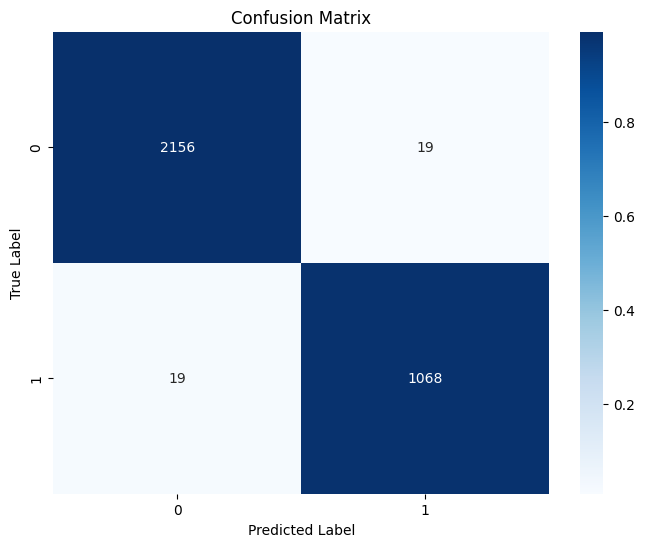

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 1.00


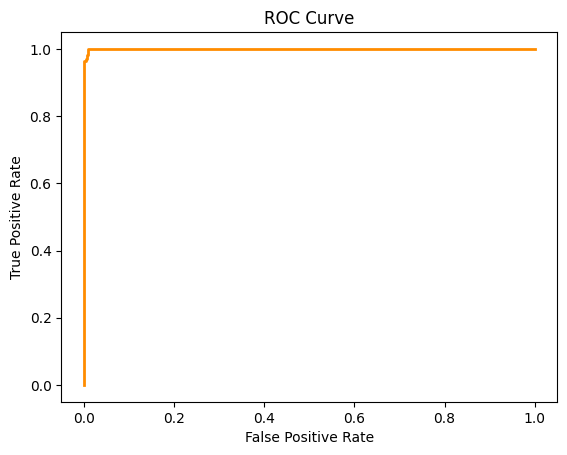

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

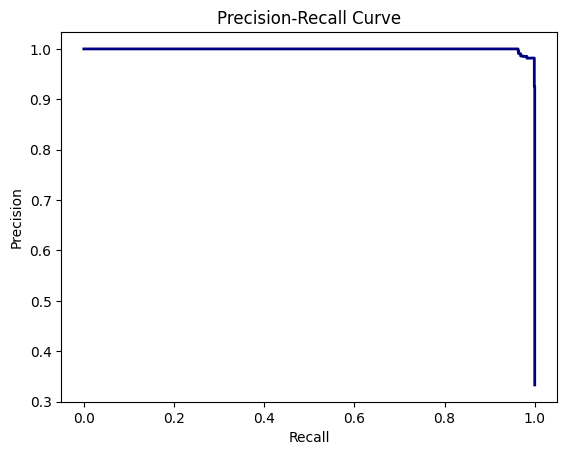

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, color='navy', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2175
           1       0.98      0.98      0.98      1087

    accuracy                           0.99      3262
   macro avg       0.99      0.99      0.99      3262
weighted avg       0.99      0.99      0.99      3262



# Prediction with 24 Most Common Genes

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

In [81]:
!pip install XGBoost
!pip install seaborn

In [101]:
df = pd.read_csv('common_genes_subset.csv')

In [102]:
import pandas as pd


# Assume `df` is your DataFrame and it has a 'class' column that contains the class labels
# 1. Separate the different classes
df_class_0 = df[df['Disease Free Status'] == 0]
df_class_1 = df[df['Disease Free Status'] == 1]


# Count the number of samples in each class
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)


# Downsample the majority class (assume class 0 is the majority here)
df_class_0_downsampled = df_class_0.sample(2*count_class_1)


# Combine the downsampled majority class DataFrame with the minority class DataFrame
common_df_downsampled = pd.concat([df_class_0_downsampled, df_class_1], axis=0)


# Shuffle the dataset
common_df_downsampled = common_df_downsampled.sample(frac=1).reset_index(drop=True)


# Now `df_downsampled` is the downsampled dataset

In [103]:
X = common_df_downsampled.drop('Disease Free Status', axis=1)
y = common_df_downsampled['Disease Free Status']

In [104]:
categorical_features = ['Hugo_Symbol', 'Consequence', 'Variant_Classification', 'Cancer Stage', 'Race']
#categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
common_x_encoded = pd.get_dummies(X, columns = categorical_features, drop_first = True)
common_x_encoded.head()

,Diagnosis Age,Mutation Count,Hugo_Symbol_AFF2,Hugo_Symbol_AKAP9,Hugo_Symbol_ANK2,Hugo_Symbol_ANK3,Hugo_Symbol_APOB,Hugo_Symbol_ARID1A,Hugo_Symbol_ASH1L,Hugo_Symbol_ATM,...,Cancer Stage_STAGE IB,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Black or African American,Race_White
0,45,128,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40,31,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,72,25,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,62,52,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,48,176,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [105]:
X_train, X_test, y_train, y_test = train_test_split(common_x_encoded, y, test_size=0.1, random_state=42, stratify = y)

In [106]:
numeric_features = ['Diagnosis Age', 'Mutation Count']
#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the desired columns in the DataFrame
scaler.fit(X_train[['Diagnosis Age', 'Mutation Count']])

# Now transform the columns
X_train[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_train[['Diagnosis Age', 'Mutation Count']])
X_test[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_test[['Diagnosis Age', 'Mutation Count']])

In [107]:
import xgboost as xgb

In [108]:
from sklearn.utils import class_weight
#model = LogisticRegression(class_weight = 'balanced')
model = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)

In [117]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [118]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


In [120]:
import seaborn as sns
import numpy as np

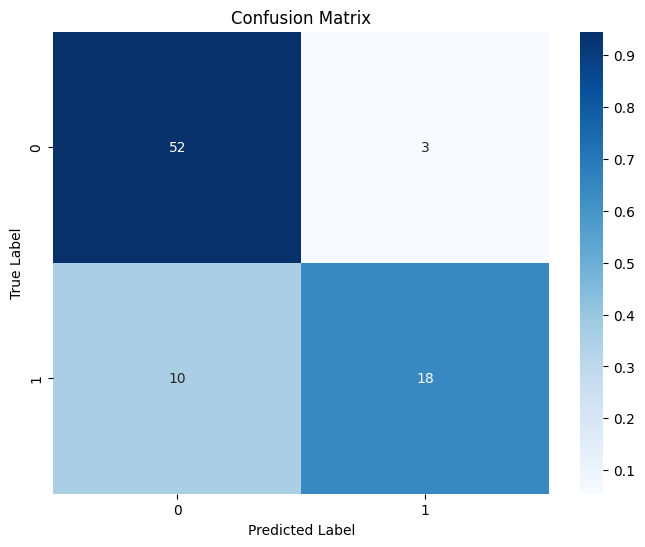

In [121]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [122]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.96


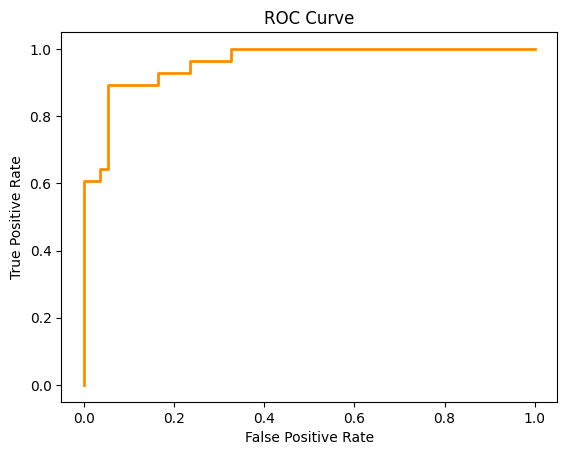

In [123]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

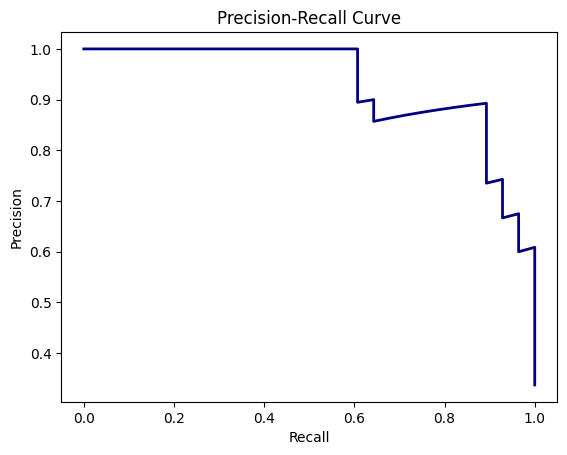

In [124]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, color='navy', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [125]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        55
           1       0.86      0.64      0.73        28

    accuracy                           0.84        83
   macro avg       0.85      0.79      0.81        83
weighted avg       0.84      0.84      0.84        83



In [126]:
feature_importances = model.feature_importances_

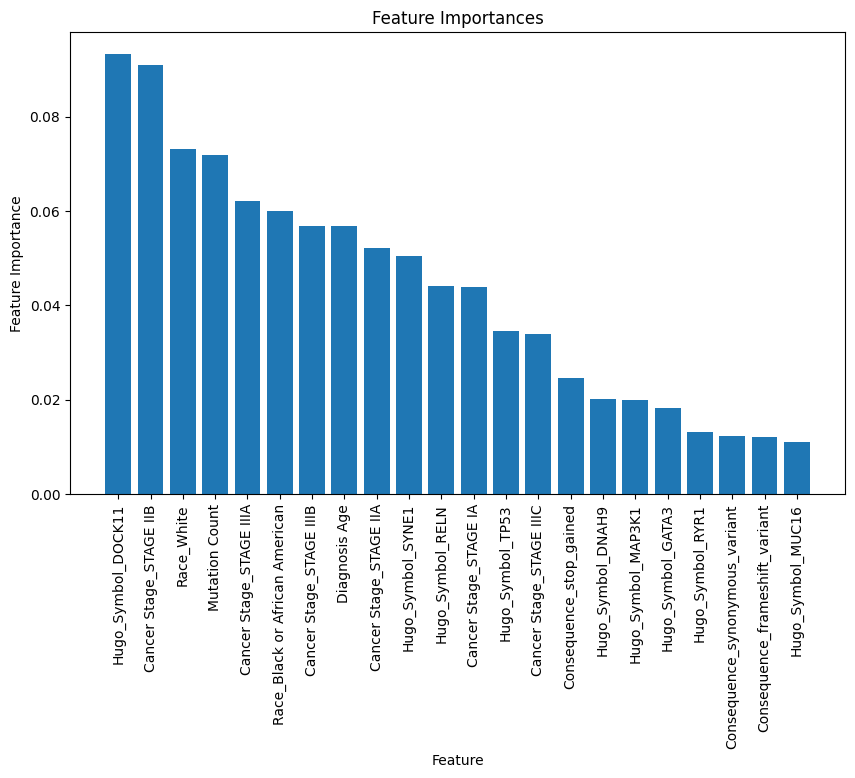

In [129]:
feature_names = common_x_encoded.columns.tolist()

def plot_feature_importances(importances, feature_names, threshold=0.01):

    # Create a sorted index of feature importances
    sorted_idx = importances.argsort()[::-1]

    # Filter out features with importances below the threshold
    sorted_idx = sorted_idx[importances[sorted_idx] > threshold]

    # Plot the top N features
    N = len(sorted_idx)
    plt.figure(figsize=(10, 6))
    plt.bar(range(N), importances[sorted_idx], align='center')
    plt.xticks(range(N), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importances')
    plt.show()

plot_feature_importances(feature_importances, feature_names)


In [130]:
common_x_encoded

,Diagnosis Age,Mutation Count,Hugo_Symbol_AFF2,Hugo_Symbol_AKAP9,Hugo_Symbol_ANK2,Hugo_Symbol_ANK3,Hugo_Symbol_APOB,Hugo_Symbol_ARID1A,Hugo_Symbol_ASH1L,Hugo_Symbol_ATM,...,Cancer Stage_STAGE IB,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Black or African American,Race_White
0,45,128,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40,31,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,72,25,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,62,52,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,48,176,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,51,36,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
821,81,57,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
822,65,59,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
823,74,57,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
